## Observations and Insights 

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadataDF = pd.read_csv(mouse_metadata_path)
study_resultsDF = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseStudy_combinedDF = pd.merge(mouse_metadataDF, study_resultsDF, on="Mouse ID", how="outer")

# Display the data table for preview
MouseStudy_combinedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
MouseStudy_combined_gpdDF = MouseStudy_combinedDF.groupby('Mouse ID').size()
MouseStudy_combined_gpdDF.count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_miceDF = MouseStudy_combinedDF[MouseStudy_combinedDF.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_miceDF["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_miceDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMouse_df = MouseStudy_combinedDF.drop(MouseStudy_combinedDF[ MouseStudy_combinedDF['Mouse ID'] == "g989"].index)
cleanMouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
newMiceNo_df = cleanMouse_df.groupby('Mouse ID').size()
newMiceNo_df.count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
grpCleanMouse_df = cleanMouse_df.groupby(['Drug Regimen'])
tumor_mean = grpCleanMouse_df['Tumor Volume (mm3)'].mean()
tumor_median = grpCleanMouse_df['Tumor Volume (mm3)'].median()
tumor_variance = grpCleanMouse_df['Tumor Volume (mm3)'].var()
tumor_stdDev = grpCleanMouse_df['Tumor Volume (mm3)'].std()
tumor_SEM = grpCleanMouse_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Tumor Volume Mean":tumor_mean,
                           "Tumor Volume Median":tumor_median,
                           "Tumor Volume Variance":tumor_variance,
                           "Tumor Volume Std. Dev.":tumor_median,
                           "Tumor Volume SEM":tumor_SEM    
                          })
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,41.557809,0.329346
Ceftamin,52.591172,51.776157,39.290177,51.776157,0.469821
Infubinol,52.884795,51.820584,43.128684,51.820584,0.492236
Ketapril,55.235638,53.698743,68.553577,53.698743,0.603860
Naftisol,54.331565,52.509285,66.173479,52.509285,0.596466
Placebo,54.033581,52.288934,61.168083,52.288934,0.581331
Propriva,52.320930,50.446266,43.852013,50.446266,0.544332
Ramicane,40.216745,40.673236,23.486704,40.673236,0.320955
Stelasyn,54.233149,52.431737,59.450562,52.431737,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
new_summary_df = cleanMouse_df.groupby('Drug Regimen').agg(**{'Tumor Volume Mean': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                                                              'Tumor Volume Median': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
                                                              'Tumor Volume Variance': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
                                                              'Tumor Volume Std Dev.': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
                                                              'Tumor Volume SEM': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem")
                                                             })
new_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Create a new dataframe to plot on
mousedf = cleanMouse_df['Drug Regimen'].value_counts()
mousedf = pd.DataFrame(mousedf).rename(columns={"Drug Regimen": "Total number of mice"})

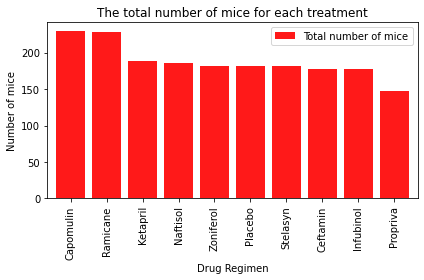

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mousedf.plot(kind="bar", rot="vertical", color='r', alpha=0.9, align="center", width=0.8)
# Set a Title and labels
plt.title("The total number of mice for each treatment")
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")
# Display the graph
plt.tight_layout()
plt.show()

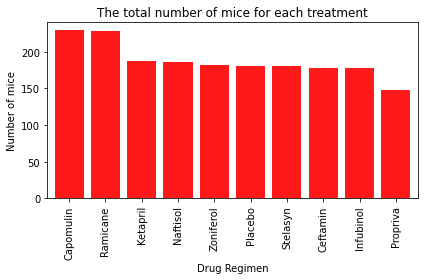

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
_mousedf = mousedf.copy()
x_axis = np.arange(len(_mousedf))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, _mousedf["Total number of mice"], color='r', alpha=0.9, align="center")
plt.xticks(tick_locations, _mousedf.index, rotation="vertical")
# Set x and y limits
plt.xlim(-0.6, len(x_axis)-0.4)
plt.ylim(0, max(_mousedf["Total number of mice"])+10)
# Set a Title and labels
plt.title("The total number of mice for each treatment")
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")

# Display the graph
plt.tight_layout()
plt.show()

In [12]:
pie_df = pd.DataFrame(cleanMouse_df["Sex"].value_counts())
pie_df

,Sex
Male,958
Female,922


Text(0.5, 1.0, 'The distribution of female versus male mice')

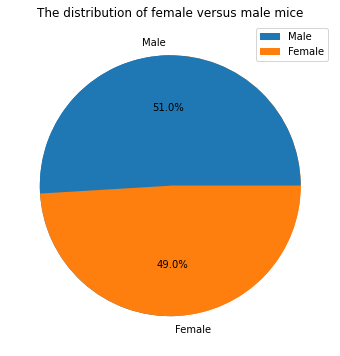

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Labels for the sections of our pie chart
labels = pie_df.index
# The values of each section of the pie chart
sizes = pie_df["Sex"]
# The colors of each section of the pie chart
colors = ["#1F77B4", "#FF7F0E"]
# Create the pie chart based upon the values above
fig, ax = plt.subplots(figsize=(11, 6), subplot_kw=dict(aspect="equal"))

patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
ax.set_title("The distribution of female versus male mice")

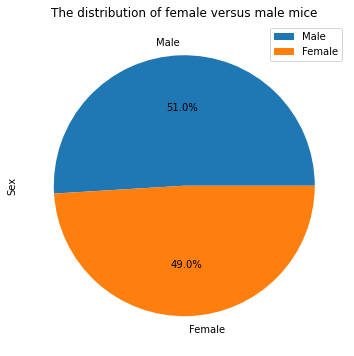

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
_pie_df = pie_df.copy()
# Create a pie chart based upon the trip duration of that single bike
df = _pie_df.plot(kind="pie", y="Sex", title=("The distribution of female versus male mice"), 
                  autopct="%1.1f%%", figsize=(11, 6))

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
drug1df = cleanMouse_df.groupby(["Mouse ID"])["Timepoint"].max()
drug1df = drug1df.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_drug1df = pd.merge(drug1df, cleanMouse_df, on="Mouse ID", how="outer")
# Variable to sort by the top timepoint
d = (new_drug1df["Timepoint_y"] == new_drug1df["Timepoint_x"])
# Remove all other timepoints except the top
new_drug1df = new_drug1df.loc[d, :]
# Variable to sort by the 4 treatment regimens
f = ((new_drug1df["Drug Regimen"] == 'Ramicane') | 
     (new_drug1df["Drug Regimen"] == 'Capomulin') | 
     (new_drug1df["Drug Regimen"] == 'Infubinol') |
     (new_drug1df["Drug Regimen"] == 'Ceftamin'))
# Remove all other treatment regimens
new_drug1df = new_drug1df.loc[f, :]
# Remove duplicate column and rename the other column
new_drug1df = new_drug1df.drop(columns=['Timepoint_y'])
new_drug1df = new_drug1df.rename(columns={"Timepoint_x": "Timepoint"})
new_drug1df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,67.973419,2
19,a251,45,Infubinol,Female,21,25,65.525743,1
39,a275,45,Ceftamin,Female,20,28,62.999356,3
66,a411,45,Ramicane,Male,3,22,38.407618,1
76,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
1812,y769,45,Ceftamin,Female,6,27,68.594745,4
1822,y793,45,Capomulin,Male,17,17,31.896238,2
1832,y865,45,Ceftamin,Male,23,26,64.729837,3
1849,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regiments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
# Create lists to fill with tumor vol data (for plotting)
tumorVol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regiment in drug_regiments:
    regimentDF = new_drug1df.loc[new_drug1df['Drug Regimen'] == drug_regiment, 'Tumor Volume (mm3)']
    tumorVol.append(regimentDF)    
    reg_quartiles = regimentDF.quantile([.25,.5,.75])
    lowerq = reg_quartiles[0.25]
    upperq = reg_quartiles[0.75]
    iqr = upperq-lowerq
    print("--------------------------")
    print(f"{drug_regiment} Treatment")
    print(f"The lower quartile of {drug_regiment} Treatment is: {lowerq}")
    print(f"The upper quartile of {drug_regiment} Treatment is: {upperq}")
    print(f"The interquartile range of {drug_regiment} Treatment is: {iqr}")
    print(f"The the median of {drug_regiment} Treatment is: {reg_quartiles[0.5]} ")
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    regiment_outlier = regimentDF.loc[(regimentDF < lower_bound) | (regimentDF > upper_bound)]
    print(f"The outlier for {drug_regiment} is: {regiment_outlier}")
    print("--------------------------")


--------------------------
Capomulin Treatment
The lower quartile of Capomulin Treatment is: 32.37735684
The upper quartile of Capomulin Treatment is: 40.1592203
The interquartile range of Capomulin Treatment is: 7.781863460000004
The the median of Capomulin Treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The outlier for Capomulin is: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------
--------------------------
Ceftamin Treatment
The lower quartile of Ceftamin Treatment is: 48.72207785
The upper quartile of Ceftamin Treatment is: 64.29983003
The interquartile range of Ceftamin Treatment is: 15.577752179999997
The the median of Ceftamin Treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The outlier for Ceftamin is: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------
----------

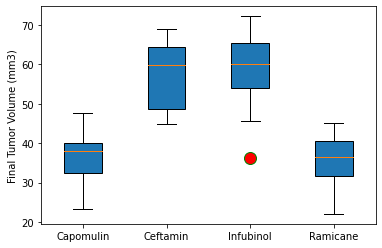

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
bp = ax1.boxplot(tumorVol, labels=labels, flierprops=flierprops, patch_artist=True)

plt.show()

## Line and Scatter Plots

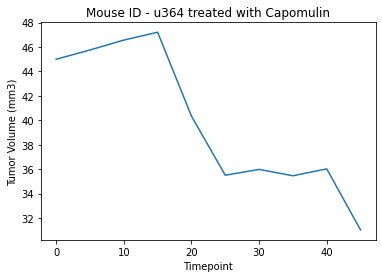

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
camp_mouse_df = cleanMouse_df.loc[(cleanMouse_df['Drug Regimen'] == 'Capomulin') & (cleanMouse_df['Mouse ID'] == 'u364')]
tum_vol = camp_mouse_df['Tumor Volume (mm3)']
timepoint = camp_mouse_df['Timepoint']
# Plot the line
plt.plot(timepoint, tum_vol)
plt.title("Mouse ID - u364 treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

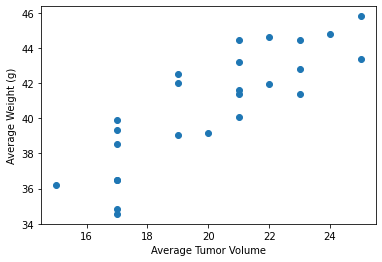

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
camp_df = cleanMouse_df.loc[(cleanMouse_df['Drug Regimen'] == 'Capomulin')]
camp_df = camp_df.groupby("Mouse ID").agg(**{'Avg Tumor Volume': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                                             'Avg Weight': pd.NamedAgg(column="Weight (g)", aggfunc="mean")
                                            })
camp_df.index.name = ""
weight = camp_df['Avg Weight']
tumor_vol = camp_df['Avg Tumor Volume']
# Plot the scatter
plt.scatter(weight,tumor_vol)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Average Weight (g)")
plt.show()

## Correlation and Regression

The correlation coefficient between the average weight(g) and the average tumor volume is 0.84


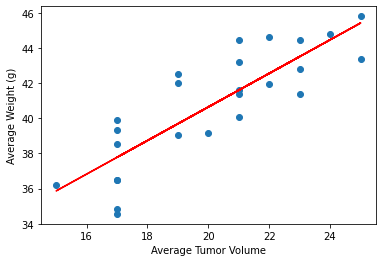

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between the average weight(g) and the average tumor volume is {round(st.pearsonr(weight,tumor_vol)[0],2)}")
# Plot the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
plt.scatter(weight,tumor_vol)
plt.plot(weight,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Average Weight (g)")
plt.show()